In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [4]:
df=pd.read_csv("D:\\Downloads\\emails.csv")

In [26]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


## Data Exploration

In [13]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [15]:
df['e'].dtype

dtype('int64')

In [39]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [12]:

df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [16]:
df.describe()

the           to          ect          and          for  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      6.640565     6.188128     5.143852     3.075599     3.124710   
std      11.745009     9.534576    14.101142     6.045970     4.680522   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     1.000000   
50%       3.000000     3.000000     1.000000     1.000000     2.000000   
75%       8.000000     7.000000     4.000000     3.000000     4.000000   
max     210.000000   132.000000   344.000000    89.000000    47.000000   

                of            a          you          hou           in  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      2.627030    55.517401     2.466551     2.024362    10.600155   
std       6.229845    87.574172     4.314444     6.967878    19.281892   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    12.000000     0.000000     0.000000     1.000000   
50%       1.000000    28.000000     1.000000     0.000000     5.000000   
75%       2.000000    62.250000     3.000000     1.000000    12.000000   
max      77.000000  1898.000000    70.000000   167.000000   223.000000   

                on           is         this        enron            i  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean     10.935808     5.386118     1.388631     1.335267    45.857889   
std      17.999402     9.144407     2.849708     4.570525    77.832221   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     0.000000     0.000000     8.000000   
50%       5.000000     2.000000     0.000000     0.000000    22.000000   
75%      12.000000     6.000000     2.000000     1.000000    49.000000   
max     302.000000   111.000000    36.000000   146.000000   972.000000   

                be         that         will         have         with  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      3.229312     0.924401     0.850928     0.804718     0.939675   
std       5.045836     2.084255     2.065738     1.444839     2.036278   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       4.000000     1.000000     1.000000     1.000000     1.000000   
max      67.000000    26.000000    53.000000    17.000000    26.000000   

              your           at           we            s          are  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      0.814385     6.932328     1.978732    41.811872     1.408546   
std       2.001731    12.949766     3.719254    66.530032     2.583277   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     8.000000     0.000000   
50%       0.000000     3.000000     1.000000    20.000000     0.000000   
75%       1.000000     7.000000     2.000000    46.000000     2.000000   
max      20.000000   267.000000    63.000000   882.000000    31.000000   

                it           by          com           as         from  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      4.501160     0.657386     1.767208     4.807425     0.813998   
std       8.377237     1.247460    11.002626     7.568755     1.657193   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     1.000000     0.000000   
50%       2.000000     0.000000     0.000000     2.000000     0.000000   
75%       5.000000     1.000000     1.000000     6.000000     1.000000   
max     131.000000    14.000000   726.000000   135.000000    21.000000   

             

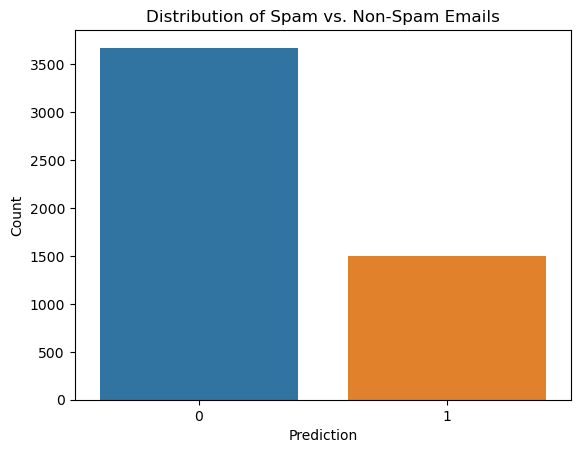

In [13]:
# Plotting the distribution of spam vs. non-spam emails
sns.countplot(x='Prediction', data=df)
plt.title('Distribution of Spam vs. Non-Spam Emails')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.show()


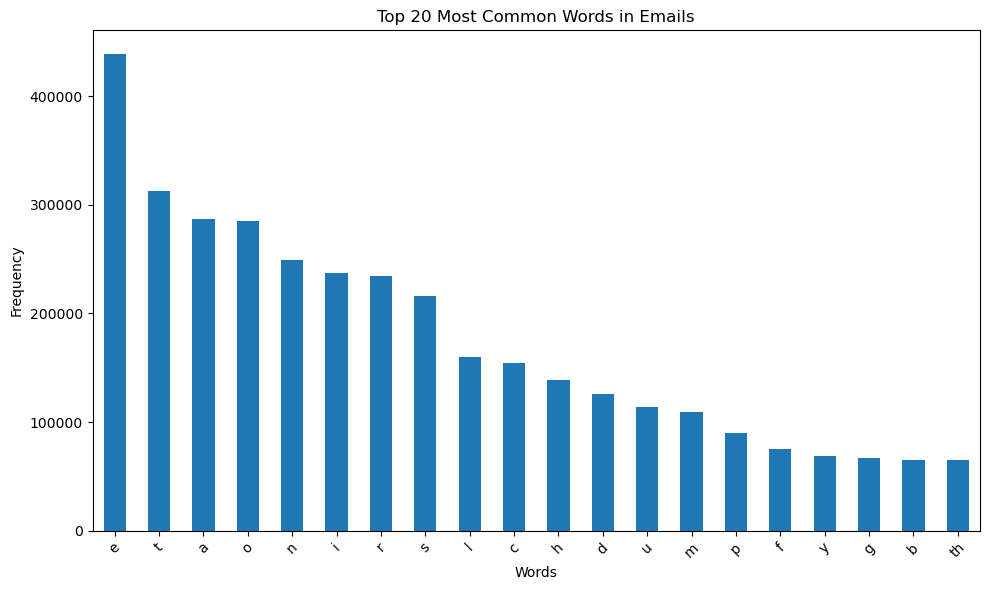

In [14]:
# Summing up word frequencies across all emails
word_freq = df.iloc[:, 1:].sum(axis=0)  # Summing columns excluding the first 'Email No.' column

# Visualizing word frequencies for the most common words
plt.figure(figsize=(10, 6))
word_freq.sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Top 20 Most Common Words in Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

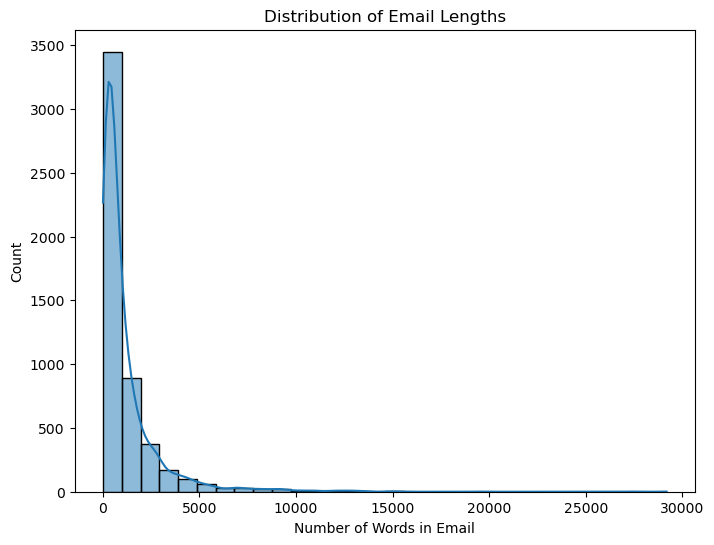

In [18]:
email_lengths = df.iloc[:, 1:].sum(axis=1)  # Summing row-wise, excluding the first 'Email No.' column

plt.figure(figsize=(8, 6))
sns.histplot(email_lengths, bins=30, kde=True)
plt.title('Distribution of Email Lengths')
plt.xlabel('Number of Words in Email')
plt.ylabel('Count')
plt.show()

In [19]:
correlation = df.corr()['Prediction'].iloc[1:]  # Assuming 'Prediction' is the first column


C:\Users\ammar\AppData\Local\Temp\ipykernel_6656\585775876.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['Prediction'].iloc[1:]  # Assuming 'Prediction' is the first column


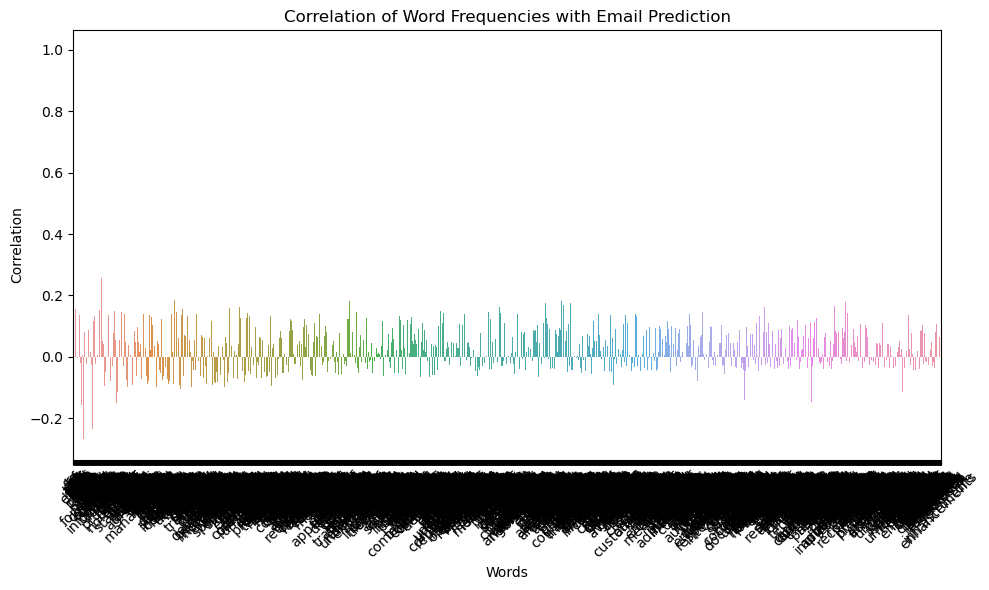

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title('Correlation of Word Frequencies with Email Prediction')
plt.xlabel('Words')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Dimensionality Reduction through PCA

In [27]:
X = df.iloc[:, 1:-1]  # Exclude 'Email No.' and 'Prediction' columns
y = df['Prediction']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=0.90)  # Retain 90% of the variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)


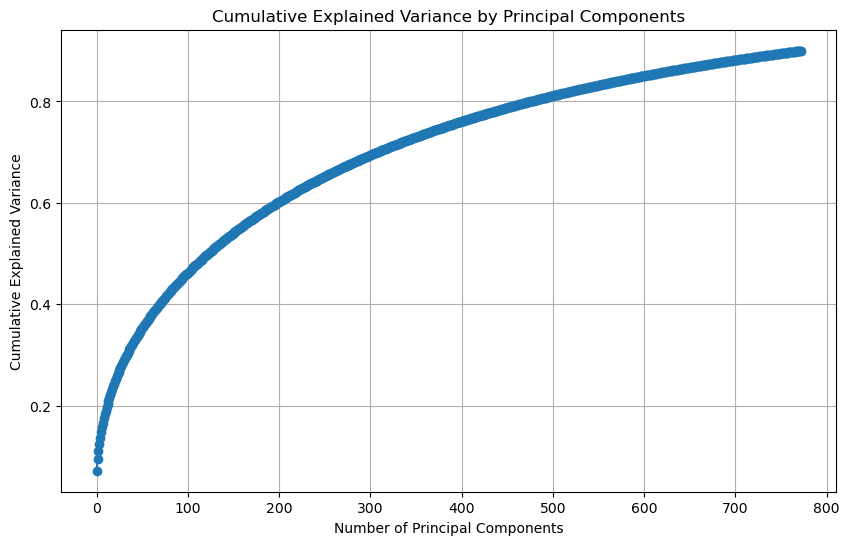

In [28]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [29]:
n_components_selected = pca.n_components_
print(f"Number of principal components selected to retain 90% variance: {n_components_selected}")

Number of principal components selected to retain 90% variance: 773


In [30]:
# X_pca now contains the reduced dimensions
print("Shape of the data after PCA:", X_pca.shape)

Shape of the data after PCA: (5172, 773)


## Logistic Regression

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

In [40]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

Logistic Regression Model Performance:
Accuracy: 0.9681
Precision: 0.9349
Recall: 0.9567
F1-score: 0.9456
AUC-ROC: 0.9822


## Random Forest

In [37]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

In [38]:
print(f"\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print(f"AUC-ROC: {roc_auc_rf:.4f}")


Random Forest Model Performance:
Accuracy: 0.9594
Precision: 0.9607
Recall: 0.8967
F1-score: 0.9276
AUC-ROC: 0.9930
